# <center> Álgebra lineal - Matrices </center>


In [1]:
import numpy as np

El algebra líneal provee una manera de representar conjuntos de ecuaciones lineales y operar compactamente sobre ellas. Por ejemplo, considera los siguientes sistemas de ecuaciones:

<center>$\begin{array}{rcl}
      4x_1 - 5x_2 & = & -13 \\
     -2x_1 + 3x_2 & = & 9
   \end{array}$</center>

En notación de matrices, podemos escribir el sistema de forma más compacta como
<center>$Ax = b$</center>
con
<center>$A = \begin{bmatrix}4 & -5\\-2 & 3\end{bmatrix}, b = \begin{bmatrix} -13 \\ 9 \end{bmatrix}$</center>

In [2]:
A = np.array([[4, -5], [-2, 3]])
B = np.array([-13, 9])

# O también
A = np.matrix([[4, -5], [-2, 3]])
B = np.matrix([-13, 9])

# Es mejor usar la función np.array() ya que la mayoría de funciones de numpy
# usan arrays. Existen ciertas ventajas utilizando np.matrix(), pero mínimas.

_____________________________

## Representación de matrices
Matriz con $m$ filas y $n$ columnas: $\mbox{A} \in \mathbb{R}^{m\times n}$. Literalmente significaría "A es un conjunto de números con $m$ filas y $n$ columnas perteneciente a ($\in$) los números reales ($\mathbb{R}$)".

Se usa la notación $a_{ij}$ (o $A_{ij}$) para representar las entradas de $A$ en la fila $i$ y la columna $j$: 
<center>$ A = \begin{bmatrix} a_{11} & a_{12} & \cdots & a_{1n} \\ a_{21} & a_{22} & \cdots & a_{2n} \\ \vdots & \vdots & \ddots & \vdots \\ a_{m1} & a_{m2} & \cdots & a_{mn} \end{bmatrix} $</center>


## Tipos de matrices

### Vectores fila y columna
Matriz con una columna y $n$ entradas: $x \in \mathbb{R}^n$. Por covención un vector con una dimensión $n$ is a menudo pensado como una matriz con $n$ filas y 1 columna, conocida como **vector columna**. Para representar un **vector fila** (una matrix con 1 fila y $n$ columnas) se suele escribir $x^T$.

El elemento $i$ de un vector es denotado como $x_i$: 
<center>$ x = \begin{bmatrix} x_1 \\ x_2 \\ \vdots \\ x_n \end{bmatrix}$</center>

### Matrices transpuestas
Sea $\pmb{A}$ una matriz con $m$ filas y $n$ columnas, en su matriz transpuesta, denotada con $\pmb{A^T}$, el elemento $a_{ij}$ de la matriz original $\pmb{A}$ se convierte en el elmento $a_{ji}$, tal como muestra la siguiente animación:
![matriz transpuesta](assets/images/matriz_transpuesta.gif)

In [3]:
A = np.array([
    [1, 2], 
    [3, 4], 
    [5, 6]
])

# Para transponer matrices usamos np.transpose()
print( np.transpose(A) )

# También podemos usar el atributo T si la matriz tiene más de 1 dimensión
A.T

[[1 3 5]
 [2 4 6]]


array([[1, 3, 5],
       [2, 4, 6]])

### Matrices diagonales
Una matriz es diagonal si todos los elementos fuera de la diagonal son nulos, es decir:

$$D = \begin{bmatrix} 
d_{11} & 0 & \cdots & 0 \\ 
0 & d_{22} & \ddots & \vdots \\ 
\vdots & \ddots & \ddots & 0 \\
0 & \cdots & 0 & d_{nm} \end{bmatrix}
$$

In [4]:
# Dada una matriz M:
M = np.arange(1, 10).reshape((3, 3))
print(M)

# Podemos tomar su línea diagonal en un nuevo vector con np.diag()
D = np.diag(M)
D

[[1 2 3]
 [4 5 6]
 [7 8 9]]


array([1, 5, 9])

#### Matrices identidad
La matriz $I_n = (d_{ij})_{n \times n}$, con $d_{ij} = \left \{ \begin{matrix} 1 & \mbox{si} & i = j \\ 0 & \mbox{si} & i \ne j \end{matrix}\right.$, es decir,

$$D = \begin{bmatrix} 
1 & 0 & \cdots & 0 \\ 
0 & 1 & \ddots & \vdots \\ 
\vdots & \ddots & \ddots & 0 \\
0 & \cdots & 0 & 1 \end{bmatrix}
$$

se llama matriz identidad de orden $n$ (mismo número de $n$ filas y columnas).

In [5]:
# Para crear una matriz identidad usamos np.identity()
np.identity(3)

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

#### Matrices triangulares
Una matriz $T = (t_{ij})_{n \times n}$ se llama matriz triangular inferior/superior si todos los elementos arriba/abajo (respectivamente) de la diagonal son 0:

<center>$
Ti = \begin{bmatrix} 
t_{11} & 0 & \cdots & 0 \\ 
t_{21} & t_{22} & \ddots & \vdots \\ 
\vdots & \vdots & \ddots & 0 \\
t_{n1} & t_{n2} & \cdots & t_{nn} \end{bmatrix}
\qquad
Ts = \begin{bmatrix} 
t_{11} & t_{12} & \cdots & t_{1n} \\ 
0 & t_{22} & \cdots & t_{2n} \\ 
\vdots & \ddots & \ddots & \vdots \\
0 & \cdots & 0 & t_{nn} \end{bmatrix}
$</center>

In [6]:
# Dada una matrix M:
print(M, "\n")

# Sacamos su triangular inferior con np.tril()
Ti = np.tril(M)  # tri (triangular) l (lower)
print(Ti, "\n")

# Sacamos su triangular superior con np.triu()
Ts = np.triu(M)  # tri (triangular) u (upper)
print(Ts)

[[1 2 3]
 [4 5 6]
 [7 8 9]] 

[[1 0 0]
 [4 5 0]
 [7 8 9]] 

[[1 2 3]
 [0 5 6]
 [0 0 9]]


#### Matrices simétricas
Una matriz $S = (S_{ij})_{n \times n}$ si ${s_{ij} = s_{ji}} \forall ij$.  Si la entrada en la fila $i$, columna $j$ es igual a la entrada en la fila $j$, columna $i$, con igual número de filas y columnas. 

Dicho de otra forma, una matriz es simétrica si su transposición es igual a la matriz original:

In [7]:
# Para comprobar si una matriz es simétrica, comprobamos si todos
# los elementos coinciden con su transpuesta con la funcion np.allclose()
# Permite rangos de tolerancia (absolute tolerance - atol)
print( np.allclose(M, M.T, atol=1e-08) )

S = np.array([
    [1, 2, 1],
    [2, 3, 2],
    [1, 2, 1]
])
np.allclose(S, S.T)

False


True

__________________________________

## Operaciones con matrices

### Suma de matrices

In [8]:
# Definimos 3 matrices
A = np.arange(1, 5).reshape((2, 2))
B = np.random.randint(2, 5, 4).reshape((2, 2)) # Matriz de 4 números aleatorios del 2 al 5
C = np.ones(4).reshape((2, 2))

# Es asociativa:
print(np.allclose( (A+B)+C, A+(B+C) ))  # True

# Es conmutativa:
print(np.allclose( A+B, B+A ))  # True

True
True


### Multiplicación de matrices

![Multiplicar matrices](https://s20.postimg.org/5kjtjkw65/matrix_mul.gif)

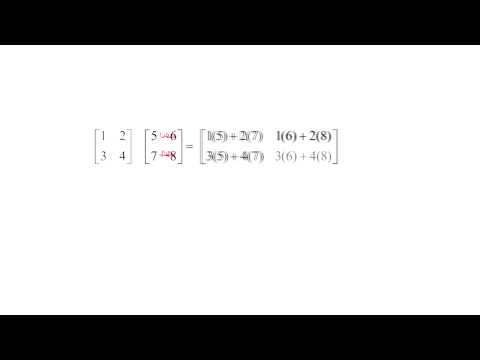

In [9]:
from IPython.display import YouTubeVideo
YouTubeVideo("bFeM4ICRt0M", width=768, height=420)

In [10]:
A = np.array([[1, 2], [3, 4]]) 
B = np.array([[5, 6], [7, 8]])

# Para multiplicar matrices con las mismas dimensiones usamos np.dot()
np.dot(A, B)

array([[19, 22],
       [43, 50]])

Las matrices no cumplen la propiedad de la conmutatividad:

In [11]:
np.dot(B, A)

array([[23, 34],
       [31, 46]])

__________________________________________

## Utilidades con matrices en numpy

In [17]:
# Crear una matriz vacía
np.empty((2, 3)) # (provee valores aleatorios residuales de la memoria)

# Crear una matriz de 0s
np.zeros((3, 4)) # 3 filas, 4 columnas

# Crear una matriz de 1s
np.ones((2, 2))

# Crear matriz de unos y ceros
np.random.randint(0, 2, (5, 5))  # start, lenght, (tamaño en x, y)

array([[0, 1, 0, 0, 0],
       [0, 1, 0, 1, 0],
       [0, 0, 0, 1, 1],
       [1, 0, 1, 0, 1],
       [1, 1, 0, 1, 0]])

### Representar matrices gráficamente

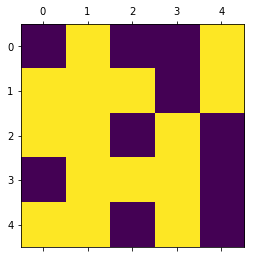

In [21]:
import matplotlib.pyplot as plt

m1 = np.random.randint(0, 2, (5, 5))

plt.matshow(m1)
plt.show()

>Fuentes:
- http://www.cs.cmu.edu/~zkolter/course/linalg/linalg_notes.pdf
- https://www.tutorialspoint.com/numpy/numpy_linear_algebra.htm
- https://www.youtube.com/watch?v=kjBOesZCoqc